In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Inter"
plt.style.use("ggplot")

# *SI* 模型

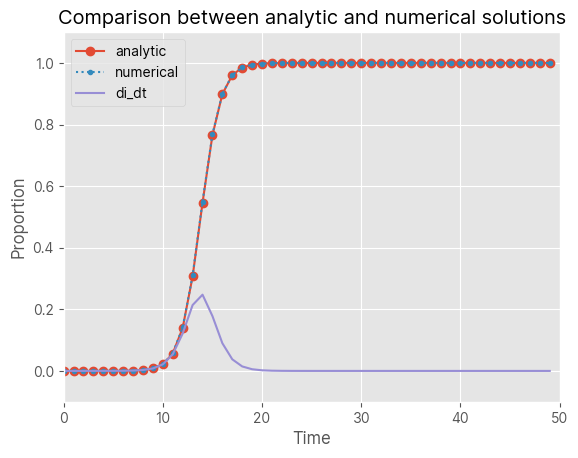

In [13]:
def SI(i, t, lamda, mu):
    di_dt = lamda * i * (1 - i)
    return di_dt


# 初始参数
n = 1e7  # 总人数
lamda = 1.0  # 日接触率，患者每天有效接触的易感者的平均人数
mu = 0.5  # 日治愈率，每天被治愈的患病者人数占患病者总数的比例
i0 = 1e-6  # 患病者的初值
t_end = 50  # 预测日期长度
t = np.arange(0.0, t_end, 1)  # (start, stop, step)

i_analy = 1 / (1 + (1 / i0 - 1) * np.exp(-lamda * t))
i_integ = odeint(SI, i0, t, args=(lamda, mu))
i_deriv = lamda * i_integ * (1 - i_integ)

# 绘图
plt.plot(t, i_analy, "-o", label="analytic")
plt.plot(t, i_integ, ":.", label="numerical")
plt.plot(t, i_deriv, "-", label="di_dt")
plt.title("Comparison between analytic and numerical solutions")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportion")
plt.axis([0, 50, -0.1, 1.1])
plt.show()

# *SIS* 模型

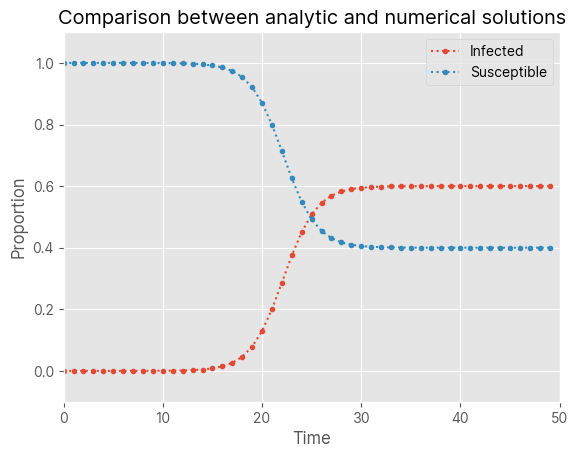

In [15]:
# 定义 SIS 模型的微分方程
def SIS(i, t, lamba, mu):
    di_dt = lamba * i * (1 - i) - mu * i
    return di_dt


# 设置模型参数
n = 1e7  # 总人数
lamba = 1.0  # 日接触率
mu = 0.4  # 日恢复率
i0 = 1e-6  # 初始感染比例
t_end = 50  # 预测日期长度
t = np.arange(0.0, t_end, 1)  # 时间范围

# 求解微分方程
ySIS = odeint(SIS, i0, t, args=(lamba, mu))

# 绘制感染和易感人群比例随时间变化的图表
plt.plot(t, ySIS, ":.", label="Infected")
plt.plot(t, 1 - ySIS, ":.", label="Susceptible")
plt.title("Comparison between analytic and numerical solutions")
plt.legend()
plt.axis([0, 50, -0.1, 1.1])
plt.xlabel("Time")
plt.ylabel("Proportion")
plt.show()

lamda=0.2	mu=0.08	sigma=2.5	(1-1/sig)=0.6


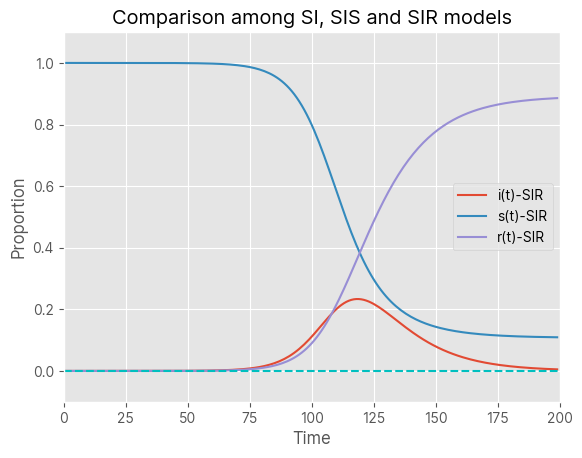

In [26]:
def SIR(y, t, lamda, mu):  # SIR模型
    i, s = y
    di_dt = lamda * s * i - mu * i  # di / dt = lamda * s * i - mu * i
    ds_dt = -lamda * s * i  # ds / dt = -lamda * s * i
    return [di_dt, ds_dt]


n = 1e7  # 　总人数
lamda = 0.2  # 日接触率，患病者每天有效接触的易感者的平均数量
sigma = 2.5  # 传染期接触数
mu = lamda / sigma  # 　日治愈率，每天被治愈的患病人数占患病者总数的比例
fsig = 1 - 1 / sigma
t_end = 200  # 预测日期长度
t = np.arange(0.0, t_end, 1)
i0 = 1e-6  # 患病者比例的初值
s0 = 1 - i0  # 易感者比例的初值
y0 = (i0, s0)

print(f"lamda={lamda}\tmu={mu}\tsigma={sigma}\t(1-1/sig)={fsig}")

ySIR = odeint(SIR, y0, t, args=(lamda, mu))

plt.plot(t, ySIR[:, 0], "-", label="i(t)-SIR")
plt.plot(t, ySIR[:, 1], "-", label="s(t)-SIR")
plt.plot(t, 1 - ySIR[:, 0] - ySIR[:, 1], "-", label="r(t)-SIR")
plt.legend()
plt.title("Comparison among SI, SIS and SIR models")
plt.xlabel("Time")
plt.ylabel("Proportion")
plt.axis([0, t_end, -0.1, 1.1])
plt.axhline(y=0, ls="--", c="c")
plt.show()

$$
\begin{cases}
\dfrac{ds}{dt} = -\lambda si, &s(0) = s_0 \\
\dfrac{de}{dt} = \lambda si - \delta e, &e(0) = e_0 \\
\dfrac{di}{dt} = \delta e - \mu i, &i(0) = i_0
\end{cases}

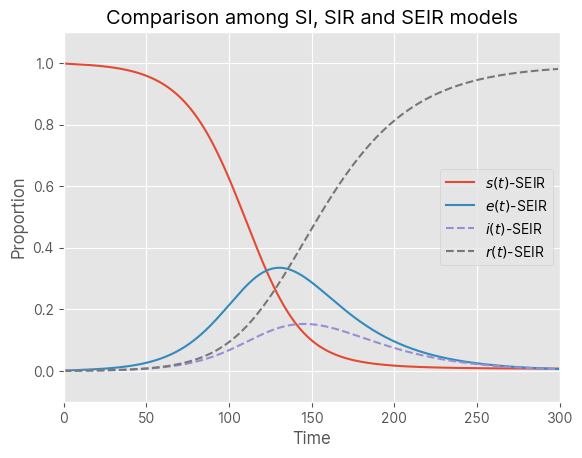

In [14]:
def SEIR(y, t, lamba, delta, mu):
    s, e, i = y
    ds_dt = -lamda * s * i
    de_dt = lamda * s * i - delta * e
    di_dt = delta * e - mu * i
    return (ds_dt, de_dt, di_dt)


n = 1e7  # 总人口
lamda = 0.3
mu = 0.06
delta = 0.03
t_end = 300
t = np.arange(0, t_end, 1)
i0 = 1e-3
e0 = 1e-3
s0 = 1 - i0 - e0

ySEIR = odeint(SEIR, (s0, e0, i0), t, args=(lamda, delta, mu))

plt.plot(t, ySEIR[:, 0], "-", label="$s(t)$-SEIR")
plt.plot(t, ySEIR[:, 1], "-", label="$e(t)$-SEIR")
plt.plot(t, ySEIR[:, 2], "--", label="$i(t)$-SEIR")
plt.plot(t, 1 - ySEIR[:, 0] - ySEIR[:, 1] - ySEIR[:, 2], "--", label="$r(t)$-SEIR")
plt.title("Comparison among SI, SIR and SEIR models")
plt.xlabel("Time")
plt.ylabel("Proportion")
plt.legend()
plt.axis([0, t_end, -0.1, 1.1])
plt.show()

# *SEIRS* 模型

lamda=0.3	mu=0.06	sigma=5.0	(1-1/sig)=0.8


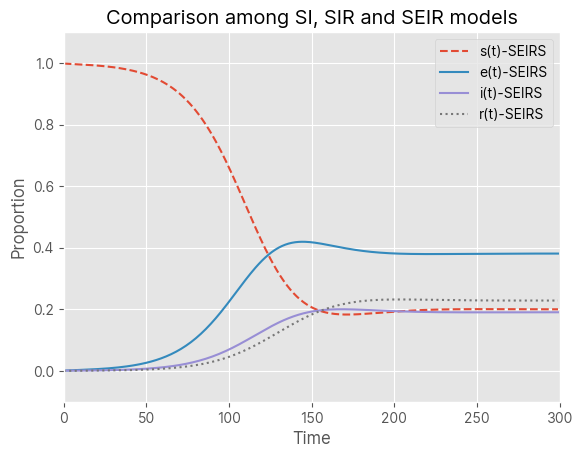

In [17]:
def SEIRS(y, t, lamda, delta, mu, recover):
    s, e, i, r = y
    ds_dt = -lamda * s * i + recover * r
    de_dt = lamda * s * i - delta * e
    di_dt = delta * e - mu * i
    dr_dt = mu * i - recover * r
    return np.array([ds_dt, de_dt, di_dt, dr_dt])


# 设置模型参数
n = 1e5  # 总人数
lamda = 0.3  # 日接触率，患病者每天有效接触的易感者平均人数
delta = 0.03  # 日发病率，每天发病成为患者的潜伏者占潜伏者总数的比例
mu = 0.06  # 日治愈率，每天治愈的患者人数占患者总数的比例
recover = 0.05  # 恢复率
sigma = lamda / mu  # 传染期接触数
fsig = 1 - 1 / sigma
t_end = 300  # 预测日期长度
t = np.arange(0.0, t_end, 1)  # (start, stop, step)
i0 = 1e-3  # 患病者比例的初值
e0 = 1e-3  # 潜伏着比例的初值
s0 = 1 - i0 - e0  # 易感者比例的初值
r0 = 0
y0 = (s0, e0, i0, r0)  # 初值

ySEIRS = odeint(SEIRS, y0, t, args=(lamda, delta, mu, recover))

print(f"lamda={lamda}\tmu={mu}\tsigma={sigma}\t(1-1/sig)={fsig}")
plt.title("Comparison among SI, SIR and SEIR models")
plt.xlabel("Time")
plt.ylabel("Proportion")
plt.axis([0, t_end, -0.1, 1.1])
plt.plot(t, ySEIRS[:, 0], "--", label="s(t)-SEIRS")
plt.plot(t, ySEIRS[:, 1], "-", label="e(t)-SEIRS")
plt.plot(t, ySEIRS[:, 2], "-", label="i(t)-SEIRS")
plt.plot(t, ySEIRS[:, 3], ":", label="r(t)-SEIRS")
plt.legend()
plt.show()

# *SEIRD* 模型

lamda=0.3	mu=0.06	sigma=5.0	(1-1/sig)=0.8


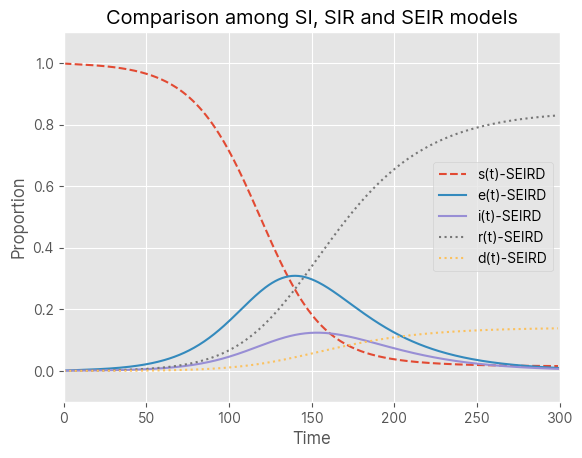

In [19]:
def SEIRD(y, t, lamda, delta, mu, delth):
    s, e, i, r, d = y
    ds_dt = -lamda * s * i
    de_dt = lamda * s * i - delta * e
    di_dt = delta * e - mu * i - delth * i
    dr_dt = mu * i
    dd_dt = delth * i
    return np.array([ds_dt, de_dt, di_dt, dr_dt, dd_dt])


# 设置模型参数
n = 1e5  # 总人数
lamda = 0.3  # 日接触率，患病者每天有效接触的易感者平均人数
delta = 0.03  # 日发病率，每天发病成为患者的潜伏者占潜伏者总数的比例
mu = 0.06  # 日治愈率，每天治愈的患者人数占患者总数的比例
delth = 0.01  # 死亡率
sigma = lamda / mu  # 传染期接触数
fsig = 1 - 1 / sigma
t_end = 300  # 预测日期长度
t = np.arange(0.0, t_end, 1)  # (start, stop, step)
i0 = 1e-3  # 患病者比例的初值
e0 = 1e-3  # 潜伏着比例的初值
s0 = 1 - i0 - e0  # 易感者比例的初值
y0 = (s0, e0, i0, 0, 0)  # 初值

ySEIRD = odeint(SEIRD, y0, t, args=(lamda, delta, mu, delth))

print(f"lamda={lamda}\tmu={mu}\tsigma={sigma}\t(1-1/sig)={fsig}")
plt.title("Comparison among SI, SIR and SEIR models")
plt.xlabel("Time")
plt.ylabel("Proportion")
plt.axis([0, t_end, -0.1, 1.1])
plt.plot(t, ySEIRD[:, 0], "--", label="s(t)-SEIRD")
plt.plot(t, ySEIRD[:, 1], "-", label="e(t)-SEIRD")
plt.plot(t, ySEIRD[:, 2], "-", label="i(t)-SEIRD")
plt.plot(t, ySEIRD[:, 3], ":", label="r(t)-SEIRD")
plt.plot(t, ySEIRD[:, 4], ":", label="d(t)-SEIRD")
plt.legend()
plt.show()

# 捕食者模型

$$
\dfrac{dx_1}{dt} = x_1 (r_1 - \lambda_1 x_2) \\
\dfrac{dx_2}{dt} = x_2 (r_2 - \lambda_2 x_1)

$$
\dfrac{dx_1}{dt} = 0,\ \dfrac{dx_2}{dt} = 0

$$
\begin{cases}
x_1 = 0 \\
x_2 = 0
\end{cases}
\quad \quad
\begin{cases}
x_1 = \dfrac{r_2}{\lambda_2} \\
x_2 = \dfrac{r_1}{\lambda_1}
\end{cases}

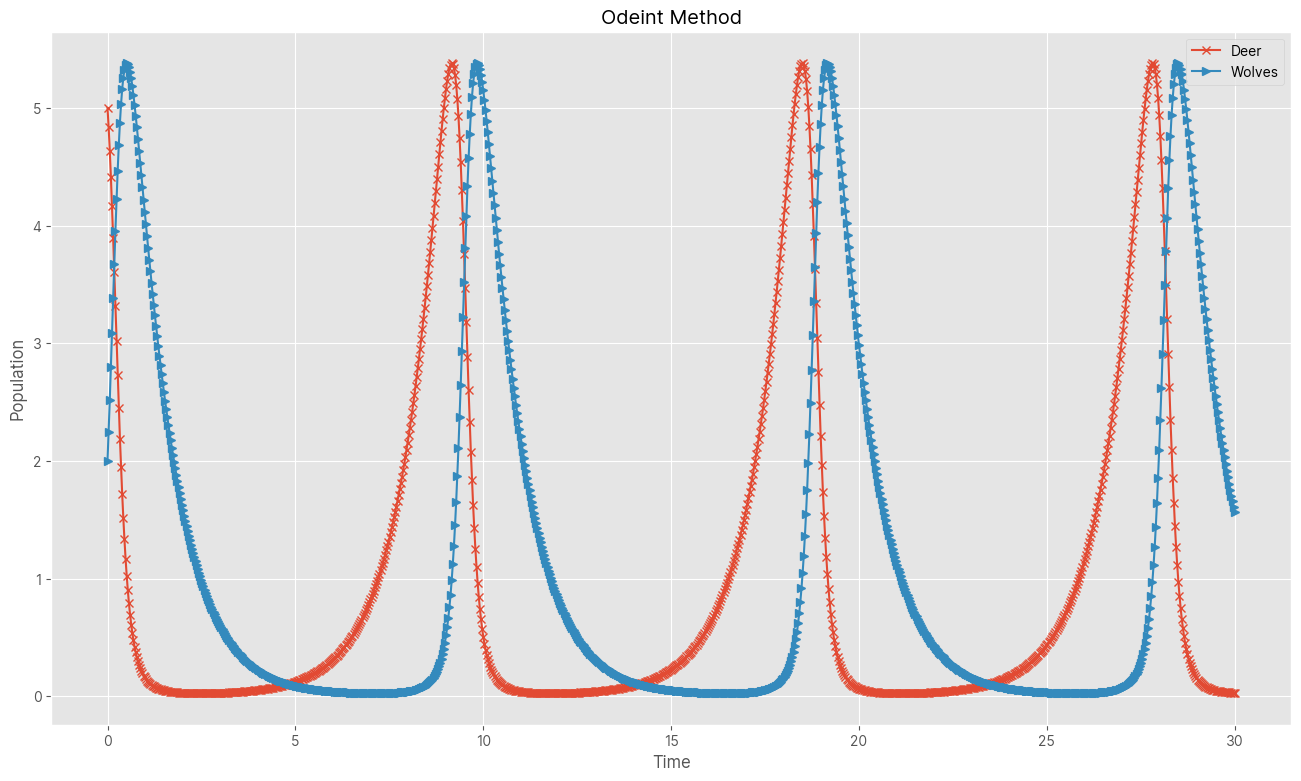

In [3]:
def derivative(X, t, alpha, beta, delta, gamma):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-delta + gamma * x)
    return [dotx, doty]


alpha = 1
beta = 1
delta = 1
gamma = 1
x0 = 5.0
y0 = 2.0

Nt = 1000
tmax = 30.0
t = np.linspace(0.0, tmax, Nt)
X0 = [x0, y0]
res = odeint(derivative, X0, t, args=(alpha, beta, delta, gamma))
x, y = res.T

plt.figure(figsize=(16, 9))
plt.title("Odeint Method")
plt.plot(t, x, "x-", label="Deer")
plt.plot(t, y, ">-", label="Wolves")
plt.ylabel("Population")
plt.xlabel("Time")
plt.legend()
plt.show()

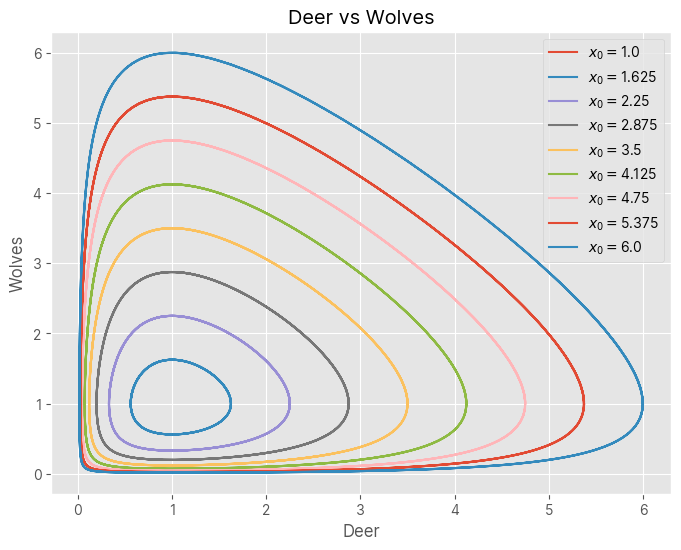

In [10]:
plt.figure(figsize=(8, 6))
IC = np.linspace(1.0, 6.0, 9)

for deer in IC:
    X0 = [deer, 1.0]
    Xs = odeint(derivative, X0, t, args=(alpha, beta, delta, gamma))
    plt.plot(Xs[:, 0], Xs[:, 1], "-", label="$x_0 =$" + str(X0[0]))
plt.xlabel("Deer")
plt.ylabel("Wolves")
plt.legend()
plt.title("Deer vs Wolves")
plt.show()